<a href="https://colab.research.google.com/github/shreyaprabhu19/RAWS2021/blob/main/RAWS_veladata_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive/')
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from scipy.fft import fft
from scipy.stats import norm
import statistics

data=open('drive/My Drive/IAAC/ooty_data_1.txt','r')
line=data.readlines()
print (len(line))

Mounted at drive/
32999936


In [ ]:
sdata = []
ndata = []
for i in range(0,len(line)):
  q = line[i].split(' ')
  ndata.append(int(q[0]))
  sdata.append(int(q[1]))

In [ ]:
spectra = int(len(sdata)/512)
spectra

64453

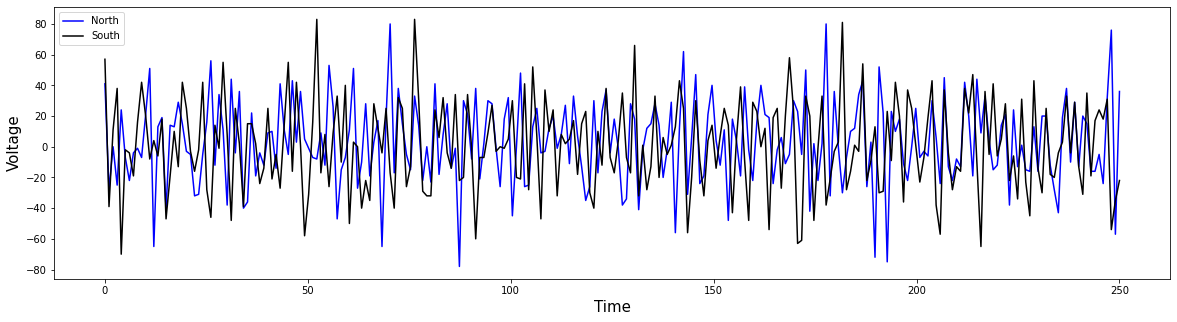

In [ ]:
y1=(ndata[0:250])
y2 = sdata[0:250]
x = np.linspace(0,250,250)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x, y1, color = 'b', label = 'North')
ax.plot(x, y2, color = 'k', label = 'South')
ax.set_ylabel('Voltage',fontsize = 15)
ax.set_xlabel('Time', fontsize = 15)
# plt.title('For South Aperture', fontsize = 15)
ax.legend()

In [ ]:
s_mean = statistics.mean(sdata)
s_sd = statistics.stdev(sdata)
n_mean = statistics.mean(ndata)
n_sd = statistics.stdev(ndata)

Text(0.5, 1.0, 'For South Aperture, mean = 0.775094, Standard deviation = 29.919544 ')

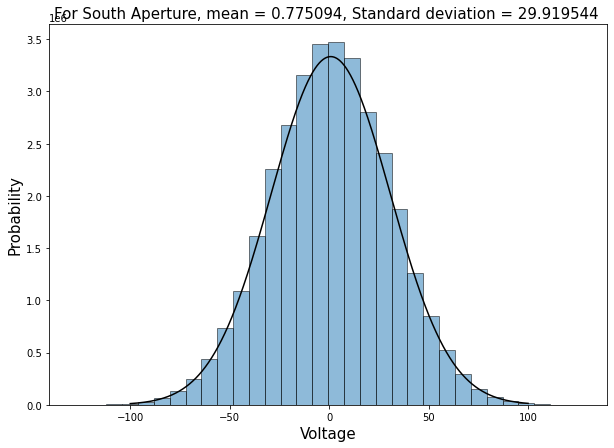

In [ ]:
#south
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(sdata, bins = 32, alpha = 0.5, edgecolor = 'k')
x = np.arange(-100,100,.01)
ax.plot(x, 250*(10**6)*norm.pdf(x,s_mean,s_sd), color = 'k')
ax.set_ylabel('Probability',fontsize = 15)
ax.set_xlabel('Voltage', fontsize = 15)
plt.title('For South Aperture, mean = %f' %s_mean + ', Standard deviation = %f ' %s_sd, fontsize = 15)

Text(0.5, 1.0, 'For South Aperture, mean = 3.484731, Standard deviation = 28.030351 ')

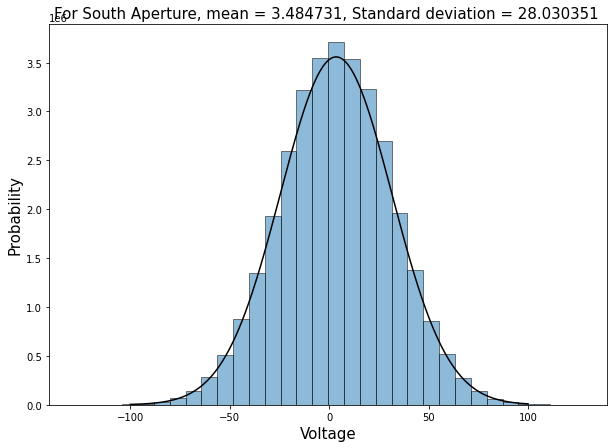

In [ ]:
#north
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(ndata, bins = 32, alpha = 0.5, edgecolor = 'k')
x = np.arange(-100,100,.01)
ax.plot(x, 250*(10**6)*norm.pdf(x,n_mean,n_sd), color = 'k')
ax.set_ylabel('Probability',fontsize = 15)
ax.set_xlabel('Voltage', fontsize = 15)
plt.title('For South Aperture, mean = %f' %n_mean + ', Standard deviation = %f ' %n_sd, fontsize = 15)

In [ ]:
spower = []
for i in sdata:
  spower.append(abs(i)**2)
npower = []
for i in ndata:
  npower.append(abs(i)**2)

In [ ]:
s_mean2 = statistics.mean(spower)
s_sd2 = statistics.stdev(spower)
n_mean2 = statistics.mean(npower)
n_sd2 = statistics.stdev(npower)

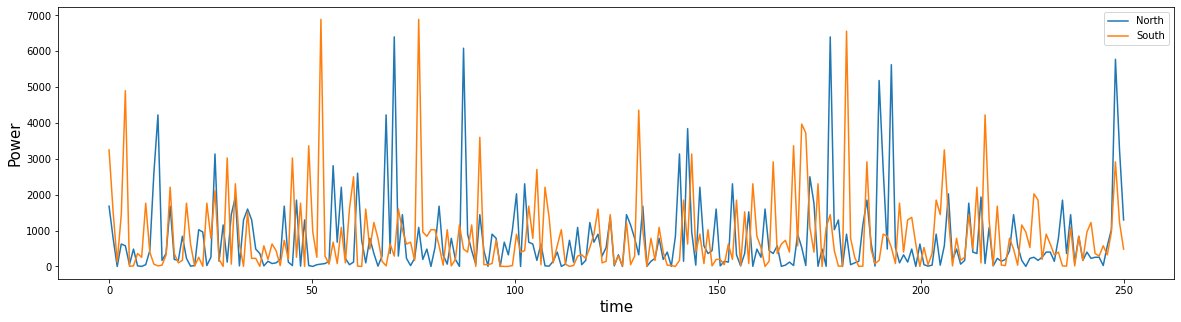

In [ ]:
x = np.linspace(0, 250, 250)
y1=(npower[0:250])
y2 = spower[0:250]
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,y1, label = 'North')
ax.plot(x,y2, label = 'South')
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('time', fontsize = 15)
ax.legend()

Text(0.5, 1.0, 'For South Aperture, mean = 895.779852, Standard deviation = 1263.241752 ')

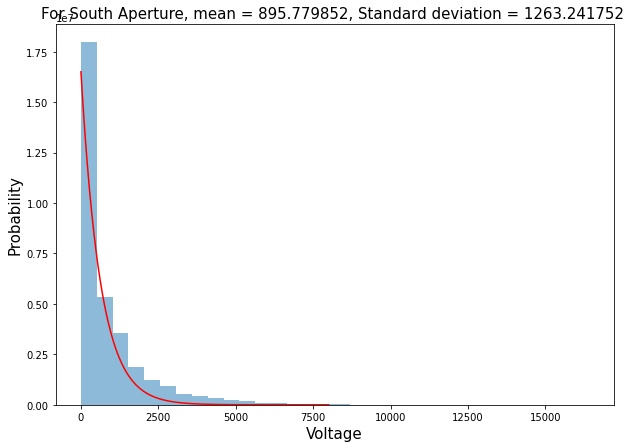

In [ ]:
#south
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(spower, bins = 32, alpha = 0.5)
x = np.linspace(0,8000,8000)
# y = 1.75*(10**7)*np.exp(-x/(s_sd2**2))
y = 1.65*(10**7)*np.exp(-x/(s_sd2)*2)
plt.plot(x, y, color='r')
ax.set_ylabel('Probability',fontsize = 15)
ax.set_xlabel('Voltage',fontsize = 15)
plt.title('For South Aperture, mean = %f' %s_mean2 + ', Standard deviation = %f ' %s_sd2, fontsize = 15)

Text(0.5, 1.0, 'For South Aperture, mean = 797.843928, Standard deviation = 1119.893227 ')

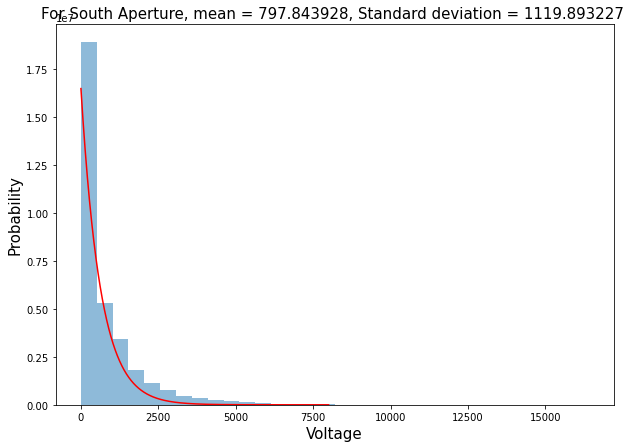

In [ ]:
#north
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(npower, bins = 32, alpha = 0.5)
x = np.linspace(0,8000,8000)
# y = 1.75*(10**7)*np.exp(-x/(n_sd2**2))
y = 1.65*(10**7)*np.exp(-x/(s_sd2)*2)
plt.plot(x, y, color='r')
ax.set_ylabel('Probability',fontsize = 15)
ax.set_xlabel('Voltage',fontsize = 15)
plt.title('For South Aperture, mean = %f' %n_mean2 + ', Standard deviation = %f ' %n_sd2, fontsize = 15)

In [ ]:
tempdata = []
sfdata = []
trdata = []
i = 0
for j in range(0, spectra):
  tempdata = []
  tempdata.append(sdata[i:i+512])
  trdata =abs(fft(tempdata))
  x= trdata.flatten()
  i = i+512
  sfdata.append(x[0:256])
type(trdata)

numpy.ndarray

In [ ]:
tempdata = []
nfdata = []
trdata = []
i = 0
for j in range(0, spectra):
  tempdata = []
  tempdata.append(ndata[i:i+512])
  trdata =abs(fft(tempdata))
  x= trdata.flatten()
  i = i+512
  nfdata.append(x[0:256])
type(trdata)

numpy.ndarray

Text(0.5, 1.0, 'For South Aperture')

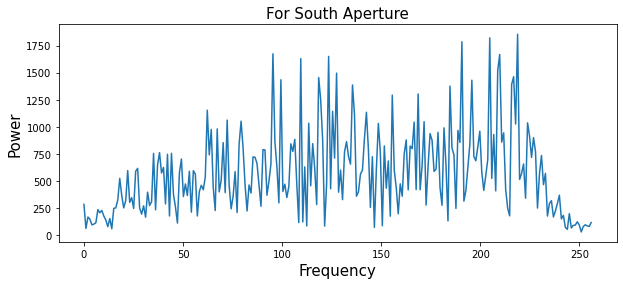

In [ ]:
x = np.linspace(0,256,256)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(x,sfdata[0])
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('Frequency',fontsize = 15)
plt.title('For South Aperture',fontsize = 15)

Text(0.5, 1.0, 'For North Aperture')

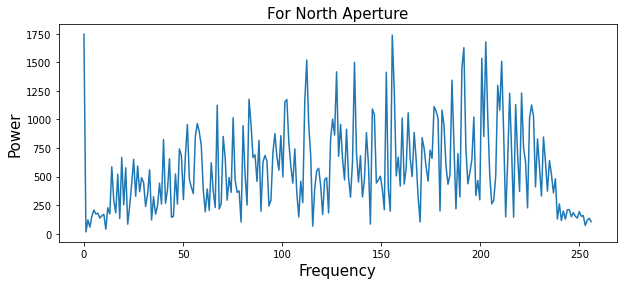

In [ ]:
x = np.linspace(0,256,256)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(x,nfdata[0])
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('Frequency',fontsize = 15)
plt.title('For North Aperture',fontsize = 15)

In [ ]:
tempdata = np.zeros(256)
for i in sfdata:
  tempdata = tempdata + i
s_ave_power = tempdata/spectra

In [ ]:
tempdata = np.zeros(256)
for i in nfdata:
  tempdata = tempdata + i
n_ave_power = tempdata/spectra

Text(0.5, 1.0, 'For South Aperture')

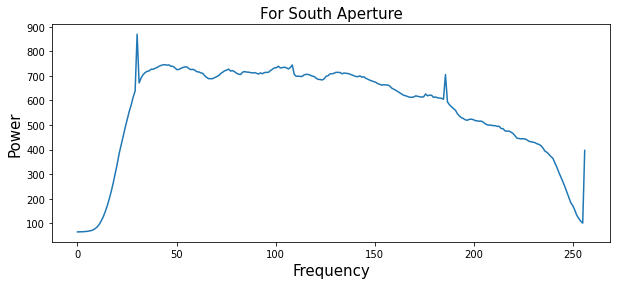

In [ ]:
x = np.linspace(0,256,256)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(x,sflip_power)
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('Frequency',fontsize = 15)
plt.title('For South Aperture',fontsize = 15)

In [ ]:
sflip_power = []
for i in range(0,256):
  sflip_power.append(s_ave_power[255-i])

In [ ]:
nflip_power = []
for i in range(0,256):
  nflip_power.append(n_ave_power[255-i])

Text(0.5, 1.0, 'For North Aperture')

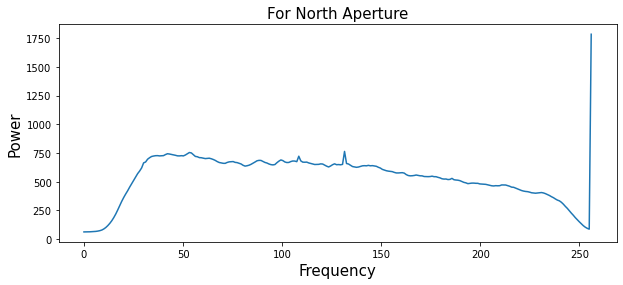

In [ ]:
x = np.linspace(0,256,256)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(x,nflip_power)
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('Frequency',fontsize = 15)
plt.title('For North Aperture',fontsize = 15)

In [ ]:
time_res = 64
s_adata = []
i = 0
while i  < 64000:
  tempdata = np.zeros(256 )
  for j in range(i,i+time_res):
    tempdata = tempdata + sfdata[j]
  tempdata = tempdata/time_res
  s_adata.append(tempdata)
  i = i + time_res

In [ ]:
time_res = 64
n_adata = []
i = 0
while i < 64000:
  tempdata = np.zeros(256 )
  for j in range(i,i+time_res):
    tempdata = tempdata + nfdata[j]
  tempdata = tempdata/time_res
  n_adata.append(tempdata)
  i = i + time_res

In [ ]:
numpy_array = np.array(n_adata)
transpose = numpy_array.T

transpose_nadata = transpose.tolist()
numpy_array = np.array(s_adata)
transpose = numpy_array.T

transpose_sadata = transpose.tolist()

In [ ]:
sflip_tspadata = []
for i in range(0,256):
  sflip_tspadata.append(transpose_sadata[255-i])


In [ ]:
numpy_array = np.array(sflip_tspadata)
transpose = numpy_array.T

flip_sadata = transpose.tolist()

In [ ]:
nflip_tspadata = []
for i in range(0,256):
  nflip_tspadata.append(transpose_nadata[255-i])
numpy_array = np.array(nflip_tspadata)
transpose = numpy_array.T

flip_nadata = transpose.tolist()

In [ ]:
len(s_adata)

1000

In [ ]:
s_ave = []
for j in range(0,256):
  temp = []
  for i in range(0,1000):
    temp.append(flip_sadata[i][j])
  s_ave.append(temp)
len(s_ave)

256

In [ ]:
n_ave = []
for j in range(0,256):
  temp = []
  for i in range(0,1000):
    temp.append(flip_nadata[i][j])
  n_ave.append(temp)
len(n_ave)

256

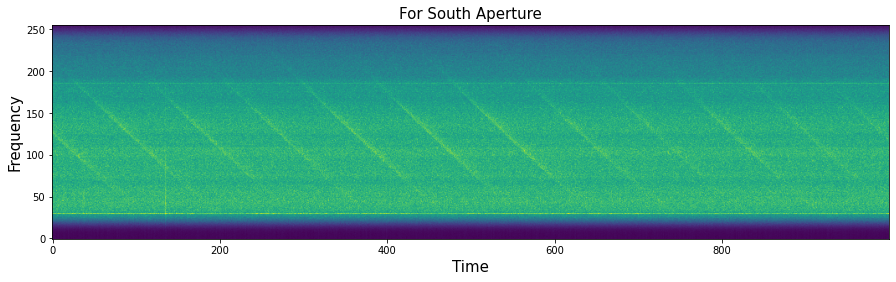

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(s_ave)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Time',fontsize = 15)
plt.title('For South Aperture',fontsize = 15)
ax.invert_yaxis()

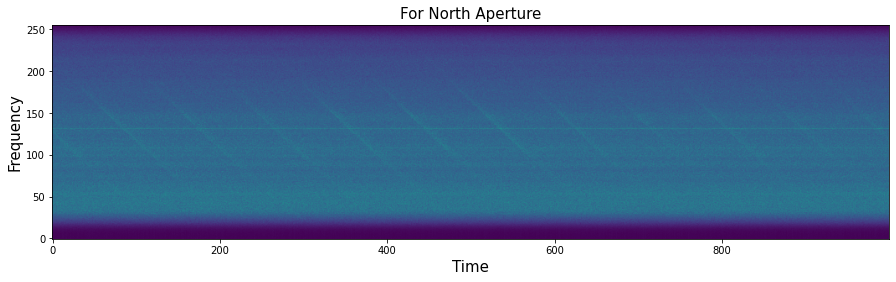

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(n_ave)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Time',fontsize = 15)
plt.title('For North Aperture',fontsize = 15)
ax.invert_yaxis()

In [ ]:
numpy_array = np.array(n_adata)
transpose = numpy_array.T

transpose_nadata = transpose.tolist()
numpy_array = np.array(s_adata)
transpose = numpy_array.T

transpose_sadata = transpose.tolist()

In [ ]:
j = 0
n_ddata = []
for i in nflip_tspadata:
  n_ddata.append(np.roll(i,j))
  j = j + 1


In [ ]:
len(nflip_tspadata)

256

In [ ]:
j = 0
s_ddata = []
for i in sflip_tspadata:
  s_ddata.append(np.roll(i,j))
  j = j + 1

In [ ]:
numpy_array = np.array(n_ddata)
transpose = numpy_array.T

transpose_nddata = transpose.tolist()
numpy_array = np.array(s_ddata)
transpose = numpy_array.T

transpose_sddata = transpose.tolist()

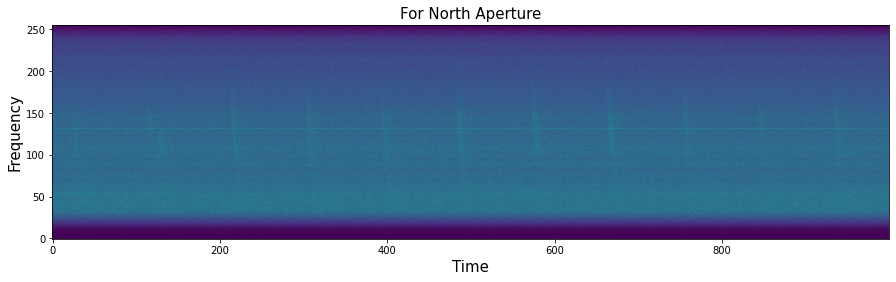

In [ ]:
nd_ave = []
for j in range(0,256):
  temp = []
  for i in range(0,1000):
    temp.append(transpose_nddata[i][j])
  nd_ave.append(temp)
len(nd_ave)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(nd_ave)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Time',fontsize = 15)
plt.title('For North Aperture', fontsize = 15)
ax.invert_yaxis()

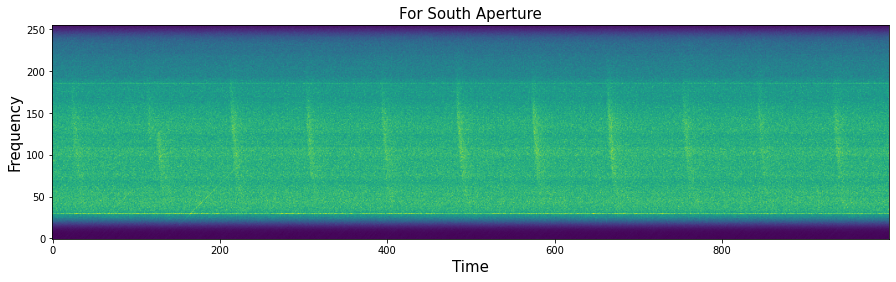

In [ ]:
sd_ave = []
for j in range(0,256):
  temp = []
  for i in range(0,1000):
    temp.append(transpose_sddata[i][j])
  sd_ave.append(temp)
len(sd_ave)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(sd_ave)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Time',fontsize = 15)
plt.title('For South Aperture', fontsize = 15)
ax.invert_yaxis()

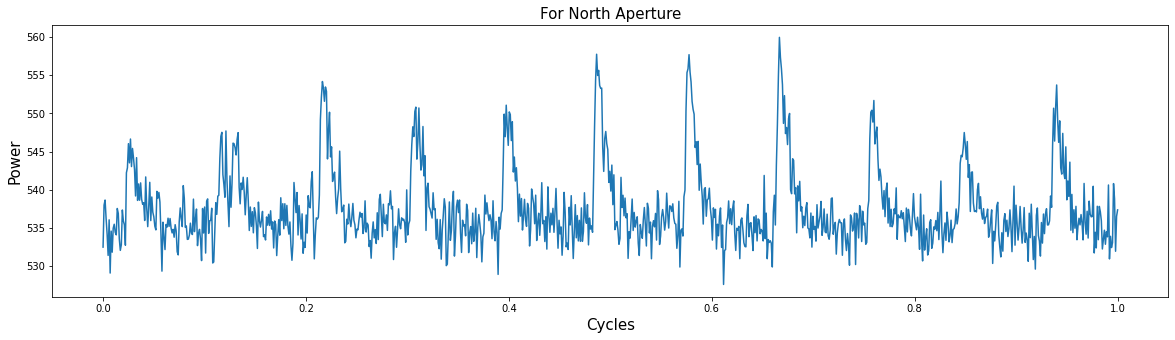

In [ ]:
tempdata = np.zeros(1000)
for i in n_ddata:
  tempdata = tempdata + i

n_ave_t = tempdata/256
x = np.linspace(0,1,1000)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('Cycles',fontsize = 15)
plt.title('For North Aperture', fontsize = 15)
ax.plot(x,n_ave_t)

Text(0.5, 1.0, 'For South Aperture')

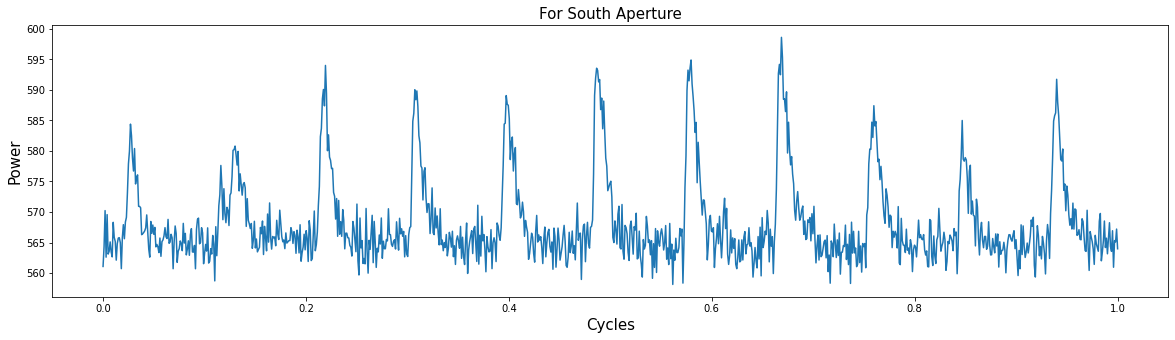

In [ ]:
tempdata = np.zeros(1000)
for i in s_ddata:
  tempdata = tempdata + i

s_ave_t = tempdata/256
x = np.linspace(0,1,1000)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,s_ave_t)
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('Cycles',fontsize = 15)
plt.title('For South Aperture', fontsize = 15)

Text(0.5, 1.0, 'For South Aperture')

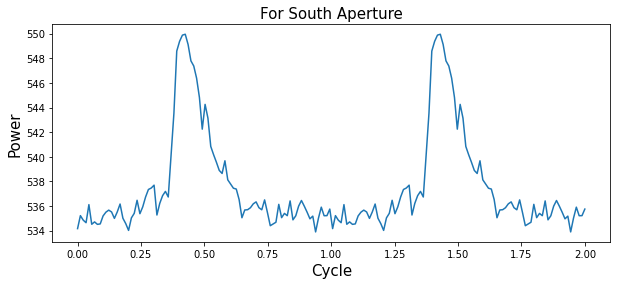

In [ ]:
tempdata = np.zeros(90)
npulse = []
i = 0
while i+90 < 1000:
  tempdata = tempdata + n_ave_t[i:i+90]
  i = i + 90
tempdata = tempdata/11
for i in tempdata:
  npulse.append(i)
for i in tempdata:
  npulse.append(i)
x = np.linspace(0,2,180)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(x,npulse)
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('Cycle',fontsize = 15)
plt.title('For South Aperture', fontsize = 15)

Text(0.5, 1.0, 'For South Aperture')

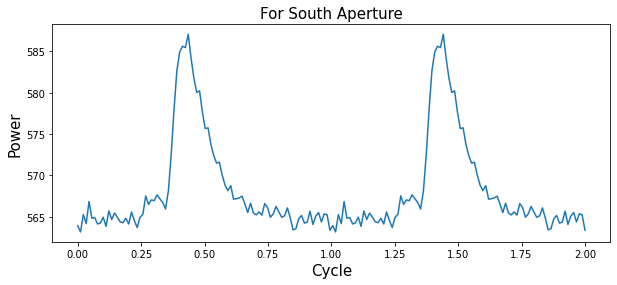

In [ ]:
tempdata = np.zeros(90)
spulse = []
i = 0
while i+90 < 1000:
  tempdata = tempdata + s_ave_t[i:i+90]
  i = i + 90
tempdata = tempdata/11
for i in tempdata:
  spulse.append(i)
for i in tempdata:
  spulse.append(i)
x = np.linspace(0,2,180)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(x,spulse)
ax.set_ylabel('Power',fontsize = 15)
ax.set_xlabel('Cycle',fontsize = 15)
plt.title('For South Aperture', fontsize = 15)